In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import pearsonr

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

## Read data

In [3]:
## параметры чтения of files
CASE_NAME = "K562 SE-"
FILE_NAME = "raw_data.xlsx"

SHEET_NAME = "K562 SE-"

In [5]:
columns_to_drop = ['gene', 'RNE FU', 'RNE PDS', 'RNE curax', 'RNE DCCP', 'curax log(FC)', 'N of rel G4-seqs', 'BG4 number', 'Max score of rel G4 seqs', 'ENH: N of all G4-seqs',
       'ENH: N of BG4', 'ENH: freq of all G4-seqs', 'ENH:freq of BG4', 'YY1 number', 'pol2 number', 'c-MYC number',
       'CTCF number', 'SP1 number', 'MAZ number', 'BRD4 number',
       'H3K27ac number', 'SE rank'
]

raw_data = (
    pd.read_excel(f"../data/{CASE_NAME}/{FILE_NAME}", sheet_name=SHEET_NAME)
    .drop(columns=columns_to_drop)
)
data_transposed = raw_data.T
raw_data.shape, data_transposed.shape

((9, 15), (15, 9))

In [6]:
raw_data.columns

Index(['FU log(FC)', 'PDS log(FC)', 'CDDP log(FC)', 'G4-motifs number',
       'G4-seqs number', 'BG4 score', 'G4-seqs score', ' YY1 score',
       ' pol2 score', ' c-myc score', ' CTCF score', ' SP1 score',
       ' MAZ score', 'BRD4 score', 'H3K27ac score'],
      dtype='object')

## Clustering and dendrogramm

In [7]:
def metric_function_abs(x, y):
    return 1 - abs(pearsonr(x, y)[0])

def metric_function_with_sign(x, y):
    return 1 - pearsonr(x, y)[0]

### 1) metric_function_abs

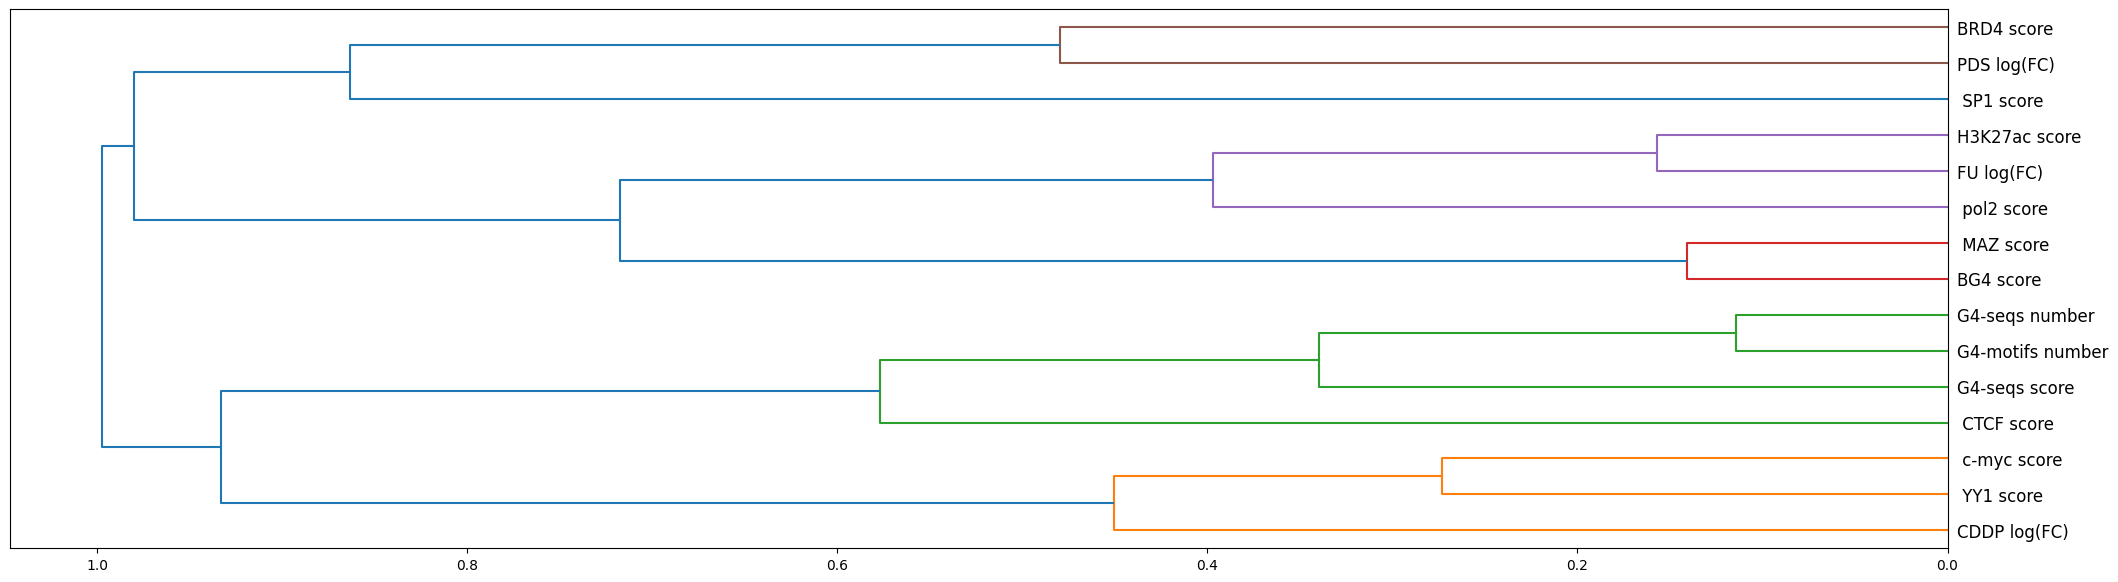

In [10]:
plt.figure(figsize=(25, 7))

linkage_data = linkage(data_transposed, method='complete', metric=metric_function_abs)
data_dendrogram_abs = dendrogram(linkage_data, orientation="left", leaf_label_func=lambda i: list(data_transposed.index)[i])

plt.savefig(f"../data/{CASE_NAME}/dendrogram_abs.png", pad_inches=10)
plt.show()

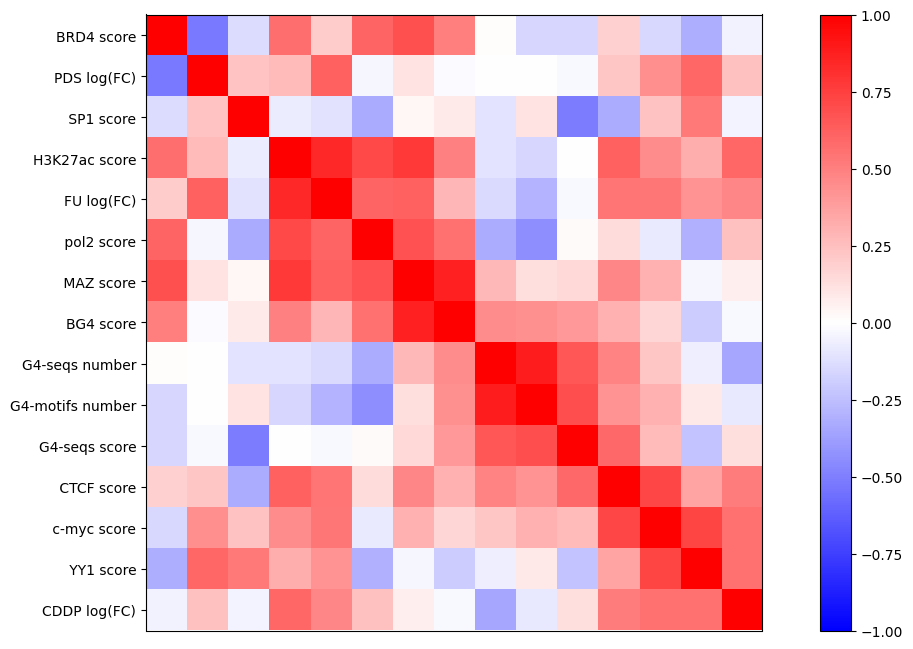

In [11]:
fig, ax = plt.subplots(1,1, figsize=(15, 8))
ordered_cols = data_dendrogram_abs["ivl"][::-1]
df_corr = raw_data[ordered_cols].corr()
img = ax.imshow(df_corr, interpolation='nearest', cmap='bwr', vmax=1, vmin=-1)

ax.set_xticks([])
ax.set_yticklabels([])
ax.set_yticks(list(range(len(df_corr.columns))))
ax.set_yticklabels(list(df_corr.columns))

fig.colorbar(img)
plt.savefig(f"../data/{CASE_NAME}/matrix_abs.png")
plt.show()

### 2) metric_function_with_sign

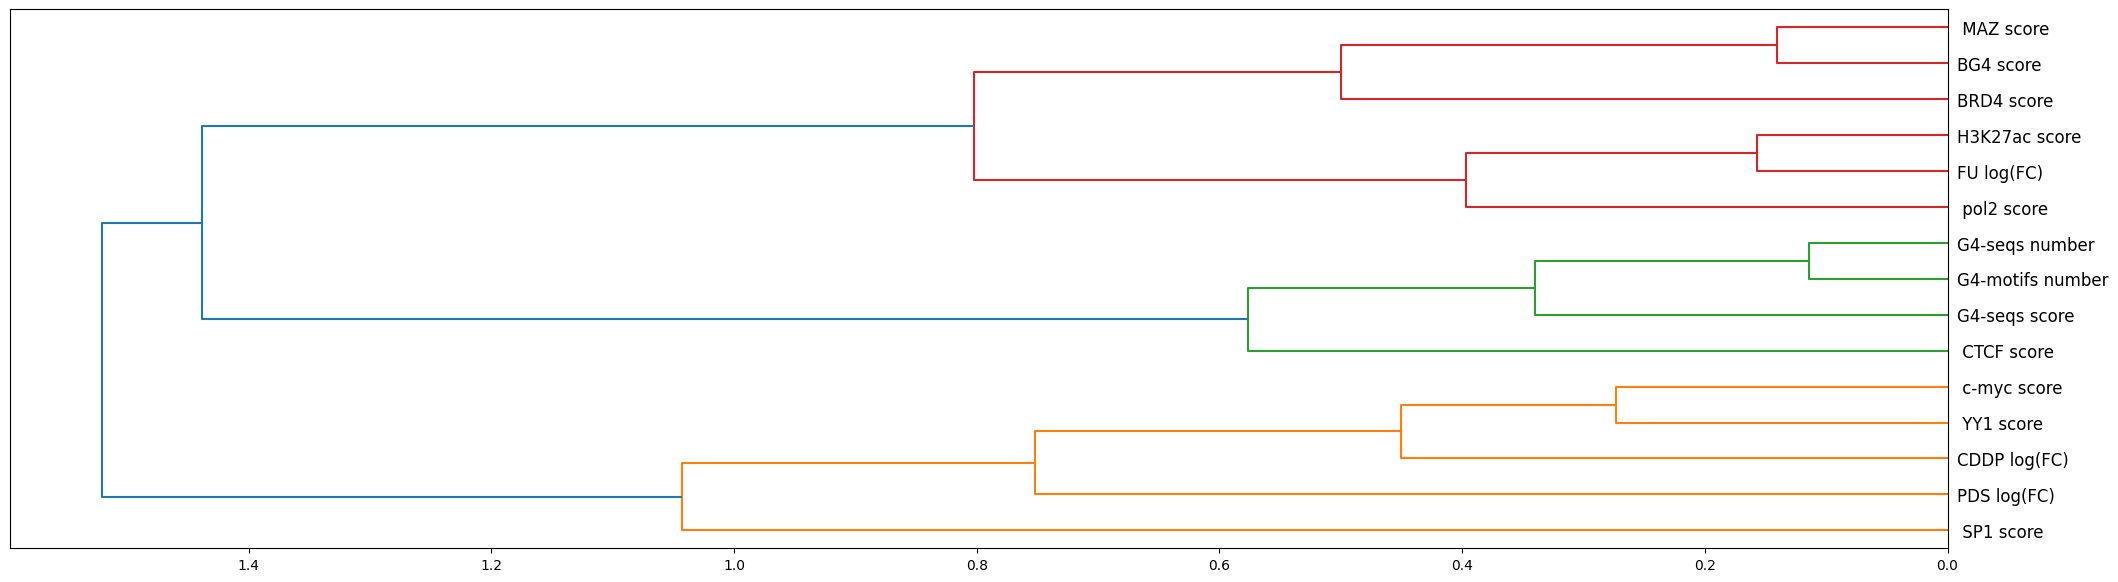

In [12]:
plt.figure(figsize=(25, 7))

linkage_data = linkage(data_transposed, method='complete', metric=metric_function_with_sign)
data_dendrogram_with_sign = dendrogram(linkage_data, orientation="left", leaf_label_func=lambda i: list(data_transposed.index)[i])

plt.savefig(f"../data/{CASE_NAME}/dendrogram_with_sign.png")
plt.show()

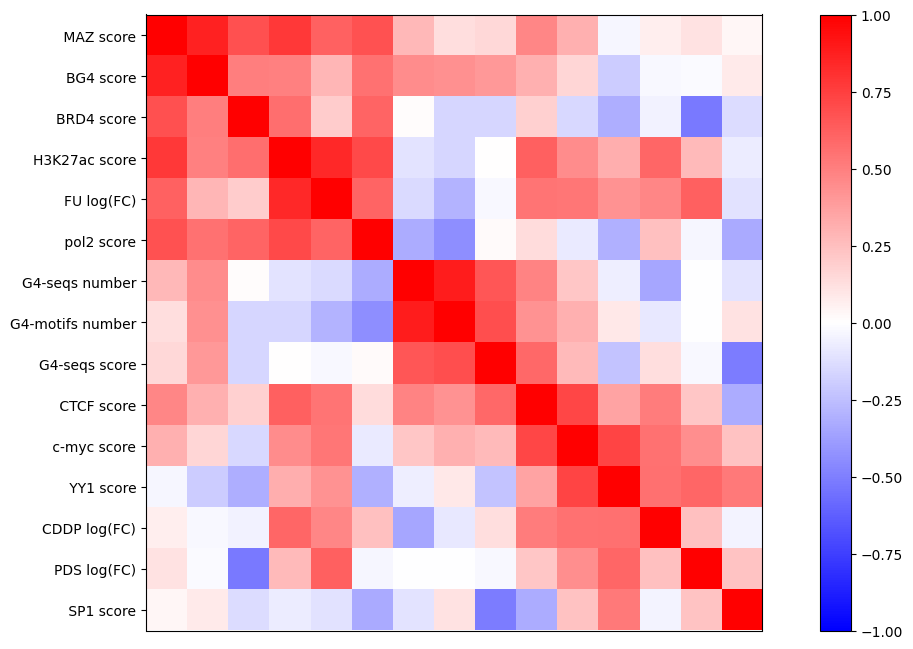

In [13]:
fig, ax = plt.subplots(1,1, figsize=(15, 8))
ordered_cols = data_dendrogram_with_sign["ivl"][::-1]
df_corr = raw_data[ordered_cols].corr()
img = ax.imshow(df_corr, interpolation='nearest', cmap='bwr', vmax=1, vmin=-1)

ax.set_xticks([])
ax.set_yticklabels([])
ax.set_yticks(list(range(len(df_corr.columns))))
ax.set_yticklabels(list(df_corr.columns))

fig.colorbar(img)
plt.savefig(f"../data/{CASE_NAME}/matrix_with_sign.png")
plt.show()